In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
df = pd.read_csv("wine_data.csv" , usecols = [0,1,2])
df.columns=["Label" , "Alcohol" , "Malic Acid"]
df.head()

,Label,Alcohol,Malic Acid
0,1,13.20,1.78
1,1,13.16,2.36
2,1,14.37,1.95
3,1,13.24,2.59
4,1,14.20,1.76


In [22]:
np.round(df.describe() , 1 )

,Label,Alcohol,Malic Acid
count,177.0,177.0,177.0
mean,1.9,13.0,2.3
std,0.8,0.8,1.1
min,1.0,11.0,0.7
25%,1.0,12.4,1.6
50%,2.0,13.0,1.9
75%,3.0,13.7,3.1
max,3.0,14.8,5.8


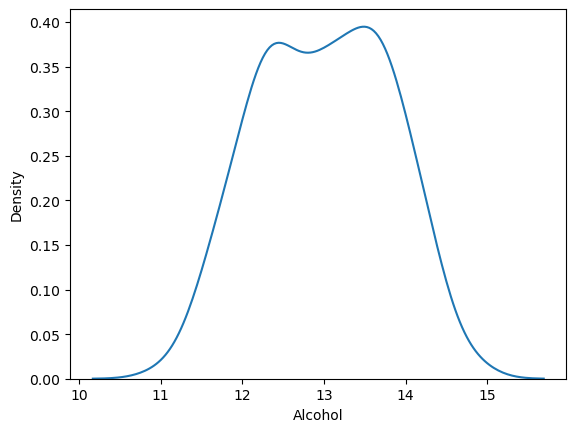

In [21]:
sns.kdeplot(df["Alcohol"])
plt.show()

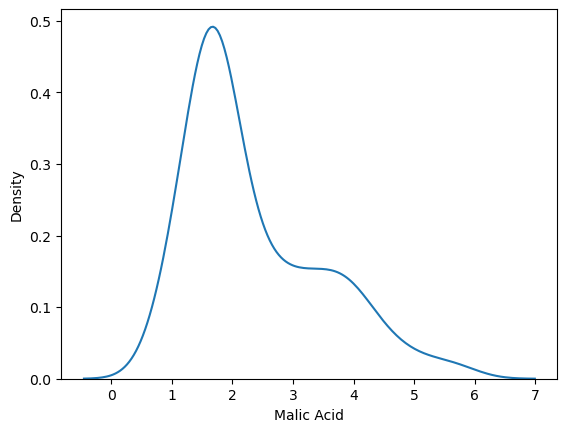

In [8]:
sns.kdeplot(df["Malic Acid"])
plt.show()

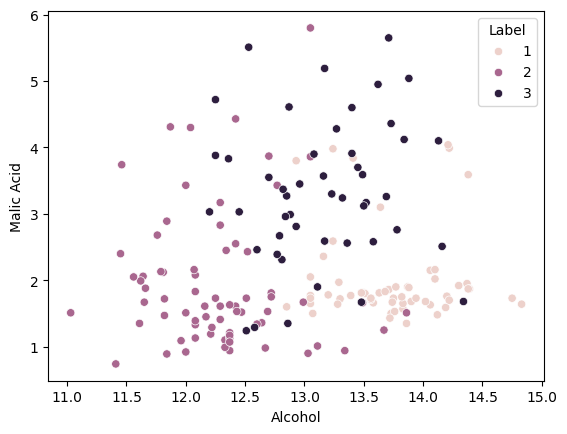

In [9]:
sns.scatterplot(df, x = "Alcohol" , y = "Malic Acid" , hue = "Label")
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df.drop(["Label"] , axis =1) ,
                                                       df["Label"], random_state = 0 , test_size = 0.3 ) 

x_train.shape , x_test.shape

22     1
108    2
174    3
144    3
71     2
Name: Label, dtype: int64

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_train)

In [18]:
x_train_scaled = pd.DataFrame( x_train_scaled  , columns = x_train.columns)
x_test_scaled = pd.DataFrame( x_test_scaled  , columns = x_test.columns)


,Alcohol,Malic Acid
0,0.489247,0.144603
1,0.155914,0.093686
2,0.602151,0.690428
3,0.572581,0.545825
4,0.661290,0.156823


In [23]:
np.round(x_train_scaled.describe() , 1 )

,Alcohol,Malic Acid
count,123.0,123.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.1
50%,0.5,0.2
75%,0.7,0.4
max,1.0,1.0


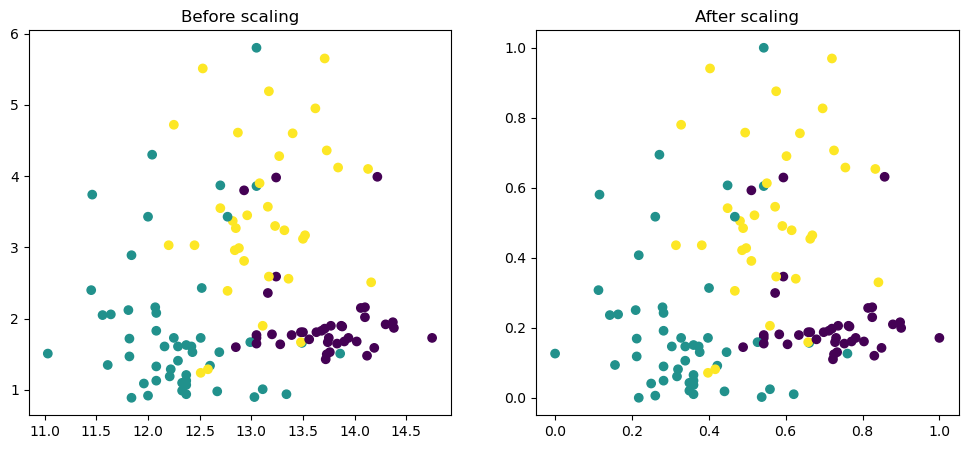

In [32]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(x_train["Alcohol"], x_train["Malic Acid"], c=y_train)
ax1.set_title("Before scaling")

ax2.scatter(x_train_scaled["Alcohol"], x_train_scaled["Malic Acid"], c=y_train)
ax2.set_title("After scaling")

plt.show()